In [96]:
import numpy as np
import pandas as pd

def read_idx(filename):
    with open(filename, 'rb') as f:
        magic = np.frombuffer(f.read(4), dtype='>i4')[0]
        num_dimensions = (magic & 0xFF)
        shape = np.frombuffer(f.read(num_dimensions * 4), dtype='>i4')
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(shape)

# Paths to the MNIST files
images_path =r"C:\Users\IDRESS COMPUTERS\Desktop\Training sets\train-images.idx3-ubyte"
labels_path =r"C:\Users\IDRESS COMPUTERS\Desktop\Training sets\train-labels.idx1-ubyte"

# Read the images and labels
images = read_idx(images_path)
labels = read_idx(labels_path)

# Convert to DataFrame
images_df = pd.DataFrame(images.reshape(images.shape[0], -1))  # Flatten the images
labels_df = pd.DataFrame(labels)

# Combine images and labels into one DataFrame
mnist_df = pd.concat([labels_df, images_df], axis=1)
mnist_df.columns = ['Label'] + [f'Pixel_{i}' for i in range(images_df.shape[1])]



In [97]:
labels_df

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [98]:

pixels = images_df
labels = labels_df


In [99]:
pixels.loc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(images_df,labels_df,test_size = 1/7.0)

In [101]:
X_test.shape

(8572, 784)

In [102]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

C:\Users\IDRESS COMPUTERS\AppData\Local\Temp\ipykernel_14044\3950815144.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier()

In [103]:
y_pred = model.predict(X_test)

In [104]:
model.score(X_test,y_test)

0.9708352776481568

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9708352776481568

In [106]:
y_test.head()

,0
12694,5
33123,7
53338,7
21302,9
31603,2


In [107]:
y_predicted = model.predict( np.array(X_test.iloc[0]).reshape(1,-1))


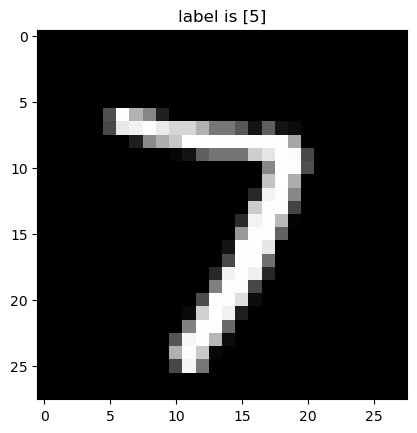

In [153]:
# testing the model using the test set

import matplotlib.pyplot as plt
label = y_predicted
pixel = X_test.iloc[0]
pixel = np.array(pixel,dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')

In [154]:
# prediction function

def Predict(value):
    y_predicted = model.predict(value.reshape(1,-1))
    print(f'inbuild pred: {y_predicted}')
    return y_predicted

In [155]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def convert_image_to_grayscale(input_image_path):
    """Convert an image containing a digit (0-9) to a 28x28 grayscale image and visualize it."""
    # Load the image
    img = Image.open(input_image_path)

    # Convert to grayscale
    img = img.convert('L')

    # Resize to 28x28 using LANCZOS resampling
    img = img.resize((28, 28), Image.LANCZOS)

    # Create a new black image
    new_img = Image.new('L', (28, 28), color=0)  # Black background
    draw = ImageDraw.Draw(new_img)

   

    # For demonstration, you would implement digit recognition here
    # This is a placeholder; you need actual recognition logic
    digit = '0'  # Replace this with the actual digit recognized from the image

    # Draw the digit on the new image in white
    draw.text((0, 0), str(digit), fill=255)  # Fill with white

    # Convert the new image to a numpy array and flatten
    image_array = np.array(new_img)
    flattened_array = image_array.flatten()

    return flattened_array

# Example usage
#file_path = r"C:\Users\IDRESS COMPUTERS\Desktop\IMG_20250905_130307.jpg"  # Replace with your image path
#grayscale_array = convert_image_to_grayscale(file_path)
#print(grayscale_array)

In [156]:
# function to recognize the entered digit

def Recognize_digit(path):
    gray_scale = convert_image_to_grayscale(path)
    predicted = Predict(gray_scale)
    return predicted,gray_scale
    

inbuild pred: [7]
Predicted number: [7]


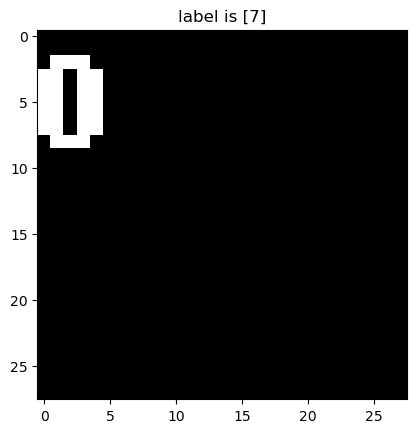

In [162]:
paths = r"C:\Users\IDRESS COMPUTERS\Desktop\IMG20250905114322.jpg"
predicted,gray_scale_number = Recognize_digit(paths)
print(f'Predicted number: {predicted}')
label = predicted
pixel = gray_scale_number
pixel = np.array(pixel,dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')




In [161]:
pip install tensorflow


                                             2.4/331.7 MB 6.1 kB/s eta 14:58:24
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 437, in _error_catcher
    yield
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\IDRESS COMPUTERS\anaconda3\lib\ssl.py", line 1274, in recv_i